Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Marius Alexandru Gurita | k12122899| 29.11.2021

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Working with datasets  </h2>

<b>Authors:</b> Brandstetter, Rumetshofer, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 15-11-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [55]:
# Required packages and the u3_utils file
import u3_utils as u3
import numpy as np
import pandas as pd
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
pd.options.display.width = 0
pd.options.display.max_colwidth = 100
u3.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.1 (✓)
Installed pandas version: 1.2.4 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed matplotlib version: 3.3.4 (✓)
Installed seaborn version: 0.11.1 (✓)


**The iris dataset**

Some exercises of this unit are based upon the iris dataset (already introduced in Unit 1). In the following, we recapitulate its main characteristics. 

Summarizing, the famous iris dataset contains measurements for $n=150$ iris flowers from three different classes, namely:

* Iris-setosa ($n_{se}=50$)
* Iris-versicolor ($n_{ve}=50$)
* Iris-virginica ($n_{vi}=50$).

Moreover, we have the following $d=4$ features:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

# Exercise 1

Given the function and datapoints (samples) defined below, perform the following task:

- Try out polynomials of degrees 1, 5, 15, and 70. Choose the polynomial which best fits the data points (without overfitting) and plot it with the function `u3.plot_polynomial_fit`. 

**Note**: You should plot **only** the polynomial which best fits the datapoints, i.e., report one plot (not all four).

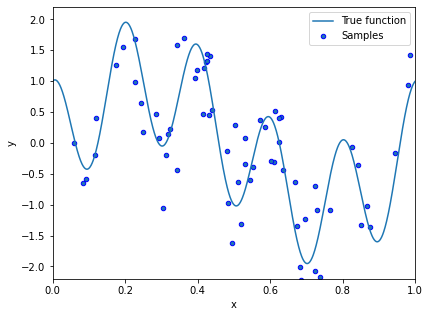

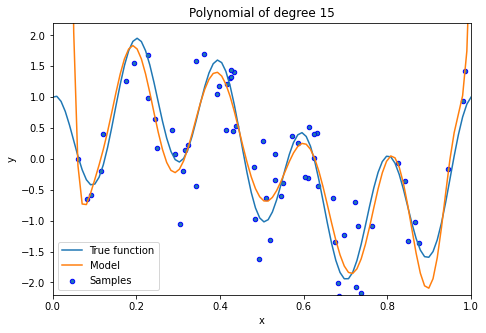

In [56]:
# function
def function(x):
    return np.sin(2 * np.pi * x) + np.cos(10 * np.pi * x)

np.random.seed(123)
n_samples = 70

# data points
x = np.random.rand(n_samples)
noise = np.random.randn(n_samples) * 0.5
y = function(x) + noise

# plot function with noise
u3.plot_function(x, y, function)
u3.plot_polynomial_fit(x, y, function, 15)

**1.1. Fit data points with a polynomial of degree $n$ and plot it.**

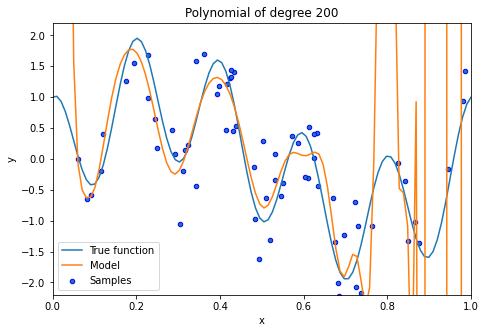

In [57]:
n=200
u3.plot_polynomial_fit(x, y, function, n)

# Exercise 2

Following the instructions given in the lecture notebook, but considering this time the iris dataset, perform the tasks below:

1. Load the iris dataset with the function `u3.load_iris`.

2. Separate the features from the labels by creating two variables: `X` (for the features) and `y` (for the labels). For the features, you should refer to the columns: 'sepal length', 'sepal width', 'petal length', and 'petal width' of the dataframe; for the labels, refer to the column 'species'.  

**Note**: To easily refer to the given features' names, a straightforward solution would be indicating the exact range of columns in the dataframe we are interested in (using the `[:-1]` trick of the lecture). To be sure that you have selected the features correctly, before going ahead with the next tasks, printing the feature names is a good idea.

**2.1. Load the iris dataset and display the data.**

In [58]:
iris = u3.load_iris()
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**2.2. Separate features and labels, and display/print the feature names.**

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


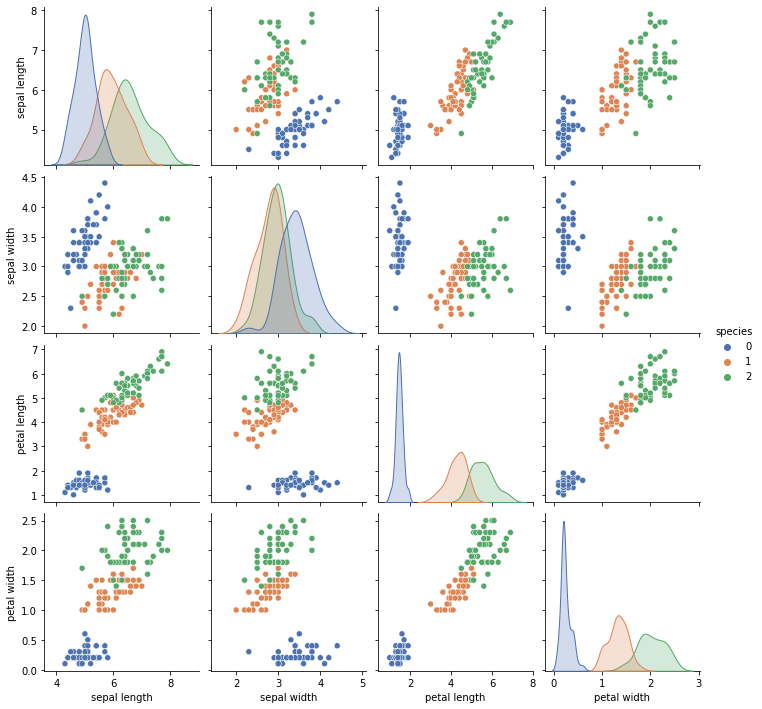

In [9]:
feature_names = iris.columns[:-1]
print(feature_names)
X = iris[feature_names]  
y = iris['species']
print(X)
print(y)
u3.plot_features(X=X, y=y, features=feature_names)

# Exercise 3

Taking into account the variables `X` and `y` previously defined, perform the following tasks:

1. Split the dataset into training and test sets considering 70% of the data for training, 30% for test. For reproducibility, consider a `random_state=123`.
2. Plot the features of the **training set** to visualize how the four features (already defined in the second exercise) correlate.

**3.1. Split `X` and `y` into train and test sets.**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


**3.2. Plot the features of the training set considering the 4 features.**

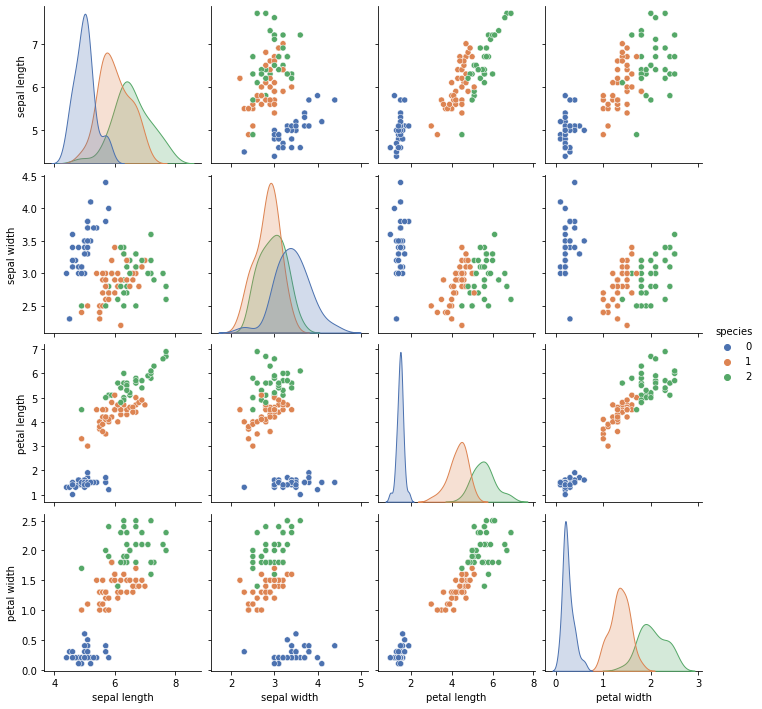

In [12]:
feature_names_subset = ['sepal length', 'sepal width', 'petal length', 'petal width']
u3.plot_features(X=X_train, y=y_train, features=feature_names_subset)

# Exercise 4

Considering the data split already performed (i.e., 70% for training, 30% for test), carry out the following tasks: 

1. Select a subset of only two features: 'sepal width' and 'petal width'.

**Note**: Remember that the feature selection should be applied to both the training and test sets, otherwise you might get some errors in the following tasks. 

2. Taking into account only the previously selected features, fit a k-nn classifier considering $k=1$, $k=3$, $k=5$ and evaluate, for each $k$, the accuracy on the test set. Choose the $k$ which achieves the highest accuracy on the **test set** and print out the model's accuracies for both the training and the test sets.
3. Plot the decision boundaries of the k-nn considering the $k$ value previously chosen.

**4.1. Select a subset of features.**

In [14]:
feature_names_subset = ['sepal width', 'petal width']

**4.2. Fit the model and print the accuracies.**

In [18]:

X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)

# k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_subset, y_train)
print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))
# k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_subset, y_train)
print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))
# k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)
print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))
print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))

Accuracy on test set: 0.9333
Accuracy on test set: 0.9333
Accuracy on test set: 0.9556
Accuracy on training set: 0.9619
Accuracy on test set: 0.9556


**4.3. Plot the decision boundaries.**

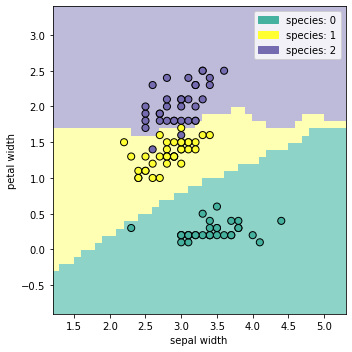

In [19]:

feature_names_subset = ['sepal width', 'petal width']
knn = KNeighborsClassifier(n_neighbors=5)
u3.plot_decision_boundaries(knn, X_train, y_train, feature_names_subset)

# Exercise 5

We have collected a new sample of the iris flower which presents the following characteristics: 

- sepal width $=2.5$ 
- petal width $=1$

Your tasks are:

1. Keeping the same model characteristics and subset of features previously defined, predict (with the already fitted model) the class of iris flower to which this new sample belongs to and print the k-nn model's prediction.

**Note**: The `predict` function expects a list of samples, so you have to wrap your sample again in a list `[sample]`.

2. Imagine that it is you now who is collecting new iris flowers. Can you provide two samples (represented in terms of the previously indicated features, i.e., 'sepal width' and 'petal width') that belong to the two remaining classes? Prove that your samples are different types of iris flower than the one new provided sample above, by printing out the predictions given by the k-nn model.

**5.1. Predict the class of the new sample and print the model's prediction.**

In [21]:
feature_names_subset = ['sepal width', 'petal width']
X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)
new_sample = [[2.5, 1]]
iris_predictions = knn.predict(new_sample)
print("The k-nearest neighbors classifier predicts classes {}".format(iris_predictions))

The k-nearest neighbors classifier predicts classes [1]


**5.2. Define two other samples and print the model's predictions.**

In [24]:
feature_names_subset = ['sepal width', 'petal width']
X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)
new_samples = [[3, 1.5],[4.5, 1]]
iris_predictions = knn.predict(new_samples)
print("The k-nearest neighbors classifier predicts classes {}".format(iris_predictions))

The k-nearest neighbors classifier predicts classes [1 0]


# Exercise 6

Since the two selected features might have influenced the performance of the model, in the following tasks, different feature combinations and $k$ values will be considered in order to find the configuration which achieves the best performance. 

1. Keeping the same split and `random_state` as previously (30% of the samples for test; `random_state=123`), use the function `u3.test_k_range()` to plot the accuracies obtained by the k-nn model considering 10 different $k$ in a range from 1 to 10, i.e., `range(1, 11)`. Concerning the features, for this task, consider only the same feature pair already used in the previous tasks, i.e., 'sepal width' and 'petal width'. 

2. Keeping the same model configuration, plot again the accuracies for the 10 different $k$, but now, each time considering a different feature pair (e.g., 'sepal length' and 'petal width', 'sepal width' and 'petal length', etc.). Try all the possible combinations and choose the feature pair which achieves the best performance on the **test set**. In the case of more than one feature pair providing the highest accuracy, choose the combination with the **lowest** $k$. As your answer, you should plot **only** the results for this feature pair.

3. Perform again the task just described, but this time evaluating also groups of three and four features, i.e., plot the accuracies for the 10 different $k$ considering all the possible feature combinations containing **three or more features**, and choose the feature group which reaches the highest test accuracy with the lowest $k$.

**Note**: More than one answer might be correct, meaning that you could find more than one feature pair which achieves the highest accuracy with the same $k$.

**Note**: There is no need to be exactly precise with the test set accuracies, just look at the plots and approximate the accuracy values.

**6.1. Plot the accuracies for 10 different $k$ considering the feature pair: 'sepal width' and 'petal width'.**

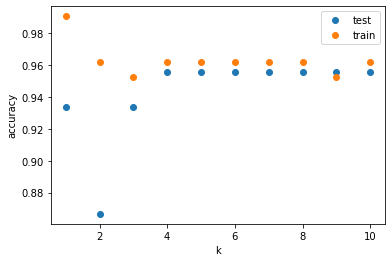

In [26]:
feature_names_subset = ['sepal width', 'petal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
u3.test_k_range(X_train, y_train, X_test, y_test, k_range)

**6.2. Plot the accuracies for 10 different $k$ for the feature pair which achieves the highest accuracy with the lowest $k$.**

 k= 1 -  best performance ['petal width', 'sepal length'] the plot is: 


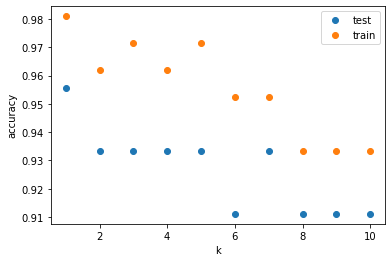

In [33]:
feature_names_subset = ['sepal width', 'petal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['sepal width', 'petal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['sepal length', 'petal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['sepal width', 'sepal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['sepal length', 'sepal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['sepal length', 'petal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal length', 'petal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal length', 'sepal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal length', 'sepal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal width', 'petal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal width', 'sepal width']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
feature_names_subset = ['petal width', 'sepal length']
X=iris[feature_names_subset]
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
k_range = range(1, 11)
#u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
print(" k= 1 -  best performance ['petal width', 'sepal length'] the plot is: ")
u3.test_k_range(X_train, y_train, X_test, y_test, k_range)

**6.3. Plot the accuracies for 10 different $k$ for the feature group ($\geq$ three features) which achieves the highest accuracy with the lowest $k$.**

the last 3 plots has the best accuracy, here you can see the last plot : =['sepal length', 'sepal width', 'petal length', 'petal width']


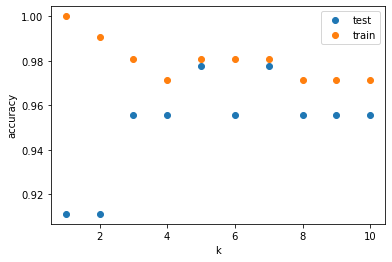

In [75]:
from itertools import combinations
feature_names_subset = ['sepal length', 'sepal width', 'petal length', 'petal width']
featureNames_list = []
for variety in range(3, len(feature_names_subset) + 1):
    combs = map(list, combinations(feature_names_subset, variety))
    featureNames_list.extend(combs)
for name in featureNames_list:
    feature_names_subset = name
    k_range = range(1, 11)
    X=iris[feature_names_subset]
    y=iris['species']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)
    #u3.test_k_range(X_train, y_train, X_test, y_test, k_range)
print("the last 3 plots has the best accuracy, here you can see the last plot : =['sepal length', 'sepal width', 'petal length', 'petal width']")
for name in featureNames_list:
    feature_names_subset = name
    k_range = range(1, 11)
    X=iris[feature_names_subset]
    y=iris['species']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)
    if(name==['sepal length', 'sepal width', 'petal length', 'petal width']):
        u3.test_k_range(X_train, y_train, X_test, y_test, k_range)

Since we have only four features, looking for the feature pair which yields the highest performance by testing each pair manually is still doable; yet, not the most practical solution. The following exercises aim to automatize this process, but first, let us introduce the package `itertools`, which allows to automatically generate all the possible combinations between the elements of a list.

**The ice-cream menu example**

Imagine an ice-cream shop offering the following flavors:

- Vanilla
- Chocolate
- Strawberry
- Lemon

In order to satisfy every customer wish, we want to provide an ice-cream menu containing all the possible varieties: from 1 flavor (lowest variety) to 4 flavors (highest variety), and all possible flavor combination within each variety. In the following, we will perform this by using the function `combinations` from the package `itertools`. Simply execute the cell below to see the results.

In [74]:
from itertools import combinations

flavors = ['vanilla', 'chocolate', 'strawberry', 'lemon']
# we start by generating an empty menu
icecream_menu = []
# we loop through a range from 1 to 4 (inclusive) to consider all the possible varieties
for variety in range(1, len(flavors) + 1):
    # with combinations() we generate all the possible combinations given a specific variety (i.e., number of flavors)
    # with map(list, ...) we turn each combination into a list
    # with extend() we add to the menu the combinations (list of flavors) for each variety
    combs = map(list, combinations(flavors, variety))
    icecream_menu.extend(combs)

# we print out each ice-cream from the menu 
for icecream in icecream_menu:
    print(icecream)
for name in featureNames_list:
    print(name)

['vanilla']
['chocolate']
['strawberry']
['lemon']
['vanilla', 'chocolate']
['vanilla', 'strawberry']
['vanilla', 'lemon']
['chocolate', 'strawberry']
['chocolate', 'lemon']
['strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry']
['vanilla', 'chocolate', 'lemon']
['vanilla', 'strawberry', 'lemon']
['chocolate', 'strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry', 'lemon']
['sepal length', 'sepal width', 'petal length']
['sepal length', 'sepal width', 'petal width']
['sepal length', 'petal length', 'petal width']
['sepal width', 'petal length', 'petal width']
['sepal length', 'sepal width', 'petal length', 'petal width']


# Exercise 7

Considering `combinations` and the code provided above, perform the tasks described below:

1. In the following, a simple solution whose purpose is to automatically find the feature pair that achieves the highest accuracy with the lowest $k$ is given. Since some parts of the code have been removed, in order to be able to run it, your task is to complete them. Then, you can verify if your answer to the second task of exercise 6 is correct. 

**Note**: The following solution contains many explanatory comments aiming to describe the given code and guide you on its completion. To easily identify the missing code parts, these have been marked with asterisks, i.e.: `# ******************* #`.

**Note**: To correctly perform the feature combinations, you should take a look at the ice-cream example. Note that you will not need a loop over varieties in this first task, since only feature pairs will be considered (not triples, quadruples, or single features).

2. Perform the previous task (i.e., find the feature combination which yields the best score with the lowest $k$) but considering now all the possible feature combinations with **at least two features**, i.e., considering also groups of three and four features. As previously, by doing this, you can verify if your answer to the third task of exercise 6 is correct. 

**Note**: Looking at the ice-cream example, pay attention when you indicate the range, since we want to consider only combinations with at least two features.

**Note**: You can copy the code from task 1 and simply make changes where necessary.

**7.1. Complete the code by adding the missing parts identified as: `# *********************** #`.**

In [93]:
# define the list of features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

all_feature_pairs = [['sepal width', 'petal width'],['sepal width', 'petal length'], ['sepal length', 'sepal width'], ['sepal length', 'petal width'], ['sepal length', 'petal length'], ['petal length', 'petal width'], ['petal length', 'sepal width'],['petal length', 'sepal length'], ['petal width', 'petal length'], ['petal width', 'sepal width'],  ['petal width', 'sepal length']]   
# split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
# define range for the evaluated k as 'k_range'
k_range = range(1, 11)
# create a list to collect the accuracies for each feature pair
results = []

# loop over the feature pairs
for pair in all_feature_pairs:
    # select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop 
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    
    # loop over the k range
    for k in k_range: 
        # define and fit the model with the number of neighbors k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset, y_train)
        score = knn.score(X_test_subset, y_test)
        # add the evaluated feature pair, accuracy, and k as a tuple with 3 elements 
        results.append((pair, score, k))
    
# convert the results (list of tuples) into a dataframe
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])
# filter the dataframe considering only the maximum accuracies
df_max = df[df['accuracy'] == max(df['accuracy'])]
# display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k) 
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
30,"[sepal length, petal width]",0.955556,1
50,"[petal length, petal width]",0.955556,1
80,"[petal width, petal length]",0.955556,1
100,"[petal width, sepal length]",0.955556,1


**7.2. Retrieve the feature combination ($\geq$ two features) which yields the best score with the lowest $k$.**

In [99]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
all_feature_pairs = [['sepal width', 'petal width'],['sepal width', 'petal length'],['sepal width', 'sepal length'],['sepal length', 'sepal width'],['sepal length', 'petal width'],['sepal length', 'petal length'],['petal length', 'petal width'],['petal length', 'sepal width'],['petal length', 'sepal length'],['petal width', 'petal length'], ['petal width', 'sepal width'],['petal width', 'sepal length'],['sepal length', 'sepal width', 'petal length'],['sepal length', 'sepal width', 'petal width'],['sepal length', 'petal length', 'petal width'],['sepal width', 'petal length', 'petal width'],['sepal length', 'sepal width', 'petal length', 'petal width'] ]
    
# split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
# define range for the evaluated k as 'k_range'
k_range = range(1, 11)
# create a list to collect the accuracies for each feature pair
results = []

# loop over the feature pairs
for pair in all_feature_pairs:
    # select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop 
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    
    # loop over the k range
    for k in k_range: 
        # define and fit the model with the number of neighbors k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset, y_train)
        score = knn.score(X_test_subset, y_test)
        # add the evaluated feature pair, accuracy, and k as a tuple with 3 elements 
        results.append((pair, score, k))
    
# convert the results (list of tuples) into a dataframe
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])
# filter the dataframe considering only the maximum accuracies
df_max = df[df['accuracy'] == max(df['accuracy'])]
# display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k) 
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
144,"[sepal length, petal length, petal width]",0.977778,5
154,"[sepal width, petal length, petal width]",0.977778,5
164,"[sepal length, sepal width, petal length, petal width]",0.977778,5


# Exercise 8

By taking again into consideration the code from exercise 7, perform the following task:

1. Employing the Random Forest classifier, retrieve the feature combination which yields the best score with the lowest number of estimators. Again, evaluate all the possible feature combinations with **at least two features** and optimize the number of estimators between 1 and 10.

**Note**: To enable reproducibility, consider `random_state=123` as a hyper-parameter of the classifier.

**8.1. Retrieve the feature combination ($\geq$ two features) which yields the best score with the lowest number of estimators.**

In [101]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
all_feature_pairs = [['sepal width', 'petal width'],['sepal width', 'petal length'],['sepal width', 'sepal length'],['sepal length', 'sepal width'],['sepal length', 'petal width'],['sepal length', 'petal length'],['petal length', 'petal width'],['petal length', 'sepal width'],['petal length', 'sepal length'],['petal width', 'petal length'], ['petal width', 'sepal width'],['petal width', 'sepal length'],['sepal length', 'sepal width', 'petal length'],['sepal length', 'sepal width', 'petal width'],['sepal length', 'petal length', 'petal width'],['sepal width', 'petal length', 'petal width'],['sepal length', 'sepal width', 'petal length', 'petal width'] ]

# split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
# define range for the evaluated k as 'k_range'
k_range = range(1, 11)
# create a list to collect the accuracies for each feature pair
results = []

# loop over the feature pairs
for pair in all_feature_pairs:
    # select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop 
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    
    # loop over the k range
    for k in k_range: 
        # define and fit the model with the number of estimators k
        clf = RandomForestClassifier(n_estimators=k, random_state=123)
        clf.fit(X_train_subset, y_train)
        score = clf.score(X_test_subset, y_test)
        # add the evaluated feature pair, accuracy, and k as a tuple with 3 elements 
        results.append((pair, score, k))
    
# convert the results (list of tuples) into a dataframe
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])
# filter the dataframe considering only the maximum accuracies
df_max = df[df['accuracy'] == max(df['accuracy'])]
# display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k) 
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
90,"[petal width, petal length]",0.955556,1
